In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import pickle

from matplotlib import pyplot as plt
import matplotlib.dates as mdates # formatting datetime x axis
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# Load correct mapping dictionary e.g. btc -> BTCUSD
pair = 'usd'
map_path = f"../supp/maps_{pair}.pkl"
with open(map_path, 'rb') as pkl_file:
    mapp = pickle.load(pkl_file)

In [3]:
tf = '1d'
key = 'doge'; market = 'BINANCE'
path = f'../data/{tf}/usd/{key}/{mapp[key]}-{market}.csv'
df = pd.read_csv(path).drop(columns = ['symbol']).set_index('datetime')
df.index = pd.to_datetime(df.index) # For plotting compatibility with mdates

In [4]:
df.ta.log_return(append = True)
df.ta.log_return(cumulative=True, append = True)

datetime
2013-12-15 01:00:00    0.000000
2013-12-16 01:00:00   -1.098612
2013-12-17 01:00:00   -1.098612
2013-12-18 01:00:00   -1.098612
2013-12-19 01:00:00    0.287682
                         ...   
2023-09-24 02:00:00    4.211304
2023-09-25 02:00:00    4.216234
2023-09-26 02:00:00    4.209655
2023-09-27 02:00:00    4.206350
2023-09-28 02:00:00    4.219508
Name: CUMLOGRET_1, Length: 3575, dtype: float64

In [5]:
df

,open,high,low,close,volume,LOGRET_1,CUMLOGRET_1
datetime,,,,,,,
2013-12-15 01:00:00,0.0006,0.0009,0.0005,0.0009,14614.0,NaN,0.000000
2013-12-16 01:00:00,0.0009,0.0009,0.0002,0.0003,40742.0,-1.098612,-1.098612
2013-12-17 01:00:00,0.0003,0.0003,0.0002,0.0003,31271.0,0.000000,-1.098612
2013-12-18 01:00:00,0.0003,0.0005,0.0002,0.0003,109602.0,0.000000,-1.098612
2013-12-19 01:00:00,0.0003,0.0017,0.0003,0.0012,45229.0,1.386294,0.287682
...,...,...,...,...,...,...,...
2023-09-24 02:00:00,0.0614,0.0620,0.0604,0.0607,5244809.0,-0.011466,4.211304
2023-09-25 02:00:00,0.0606,0.0615,0.0602,0.0610,14999874.0,0.004930,4.216234
2023-09-26 02:00:00,0.0610,0.0613,0.0595,0.0606,15475397.0,-0.006579,4.209655


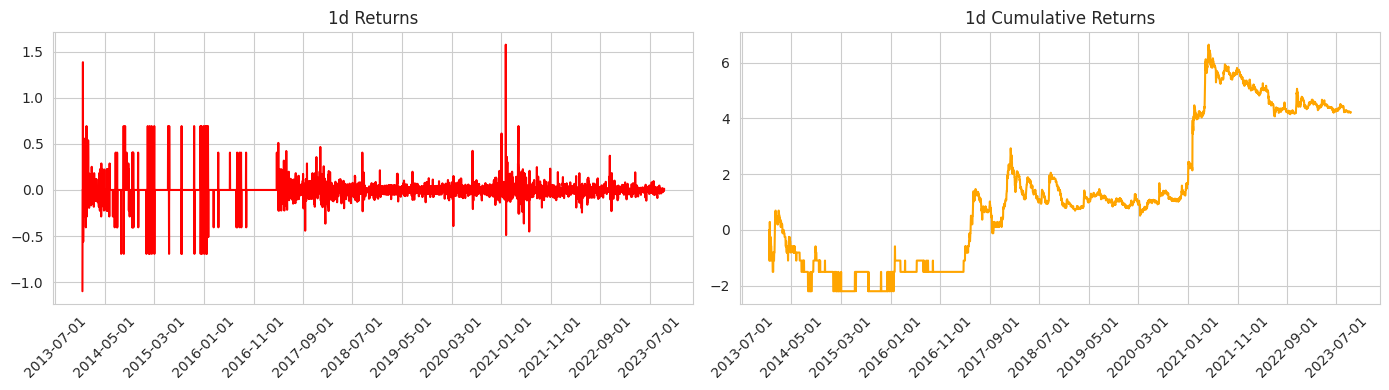

In [6]:
fig, axs = plt.subplots(figsize=(14,4), ncols=2)
axs[0].plot(df.index, df['LOGRET_1'], color = 'red'); axs[0].set_title(f'{tf} Returns')
axs[1].plot(df.index, df['CUMLOGRET_1'], color = 'orange'); axs[1].set_title(f'{tf} Cumulative Returns')

axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=10))
axs[0].tick_params(axis='x', rotation=45)

axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=10))
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, '1d Volumes')]

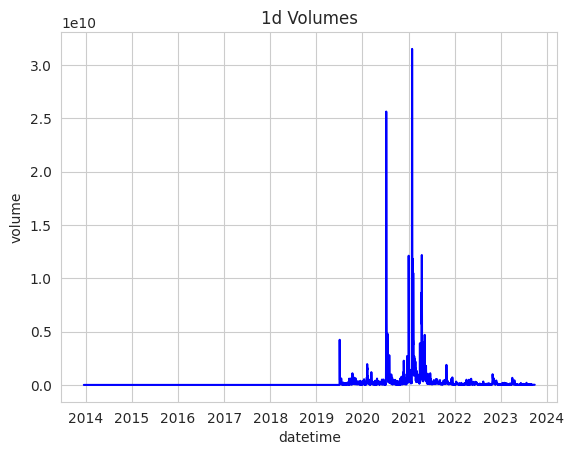

In [7]:
sns.lineplot(data=df, x=df.index, y='volume', color = 'blue').set(title = f'{tf} Volumes')
#plt.yscale('log')

[Text(0.5, 1.0, '1d Returns Distribution')]

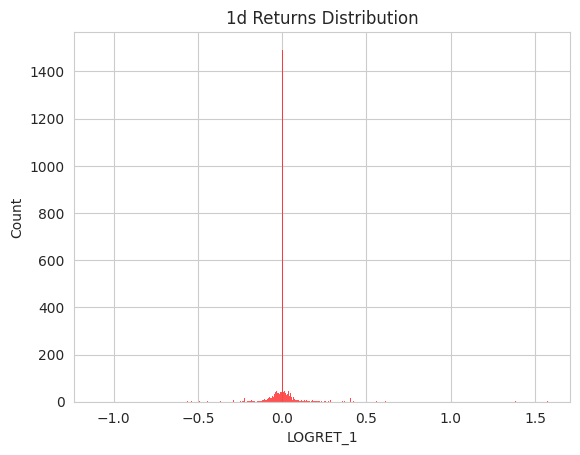

In [8]:
sns.histplot(data=df.LOGRET_1, color = 'red').set(title = f'{tf} Returns Distribution')

### Bokeh Plot Last Prices

In [9]:
from math import pi
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [10]:
def plot_ohlc(df):
    inc = df.close > df.open
    dec = df.open > df.close

    w = 12 * 60 * 60 * 1000  # 12 hours in milliseconds, usually half of timeframe
    #   h    min   s    ms

    TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

    p = figure(x_axis_type="datetime", tools=TOOLS, width=1000, title = "OHLC Chart")
    p.xaxis.major_label_orientation = pi/4
    p.grid.grid_line_alpha=0.9
    
    p.segment(df.index, df.high, df.index, df.low, color="black")
    p.vbar(df.index[inc], w, df.open[inc], df.close[inc], fill_color="#90ee90", line_color="black")
    p.vbar(df.index[dec], w, df.open[dec], df.close[dec], fill_color="#f08080", line_color="black")

    #output_file("candlestick.html", title="candlestick.py example")
    # Enable inline plotting in the notebook
    output_notebook()

    # Show the plot in the notebook
    show(p)

In [11]:
plot_ohlc(df.loc['2022-11-12 01:00:00':'2023-03-25 01:00:00'])

Loading BokehJS ...

In [12]:
# scoprendo quanto sia figo usare i datetime come index
df.loc['2022-11-12 01:00:00':'2023-03-25 01:00:00']

,open,high,low,close,volume,LOGRET_1,CUMLOGRET_1
datetime,,,,,,,
2022-11-12 01:00:00,0.0846,0.0948,0.0783,0.0879,298201646.0,0.035904,4.581560
2022-11-13 01:00:00,0.0881,0.0914,0.0830,0.0848,141113576.0,-0.035904,4.545656
2022-11-14 01:00:00,0.0847,0.0912,0.0792,0.0858,173090258.0,0.011723,4.557380
2022-11-15 01:00:00,0.0857,0.0895,0.0847,0.0871,69299272.0,0.015038,4.572417
2022-11-16 01:00:00,0.0869,0.0911,0.0832,0.0856,91918933.0,-0.017372,4.555046
...,...,...,...,...,...,...,...
2023-03-21 01:00:00,0.0715,0.0781,0.0705,0.0770,108116688.0,0.074108,4.449166
2023-03-22 01:00:00,0.0770,0.0780,0.0716,0.0740,123024633.0,-0.039740,4.409426
2023-03-23 01:00:00,0.0740,0.0793,0.0729,0.0777,133821792.0,0.048790,4.458216


In [19]:
pip install uniplot

  Obtaining dependency information for uniplot from https://files.pythonhosted.org/packages/eb/46/d4dc964aaedaffc8cfb369a73053aca9bc564b373957bb2b632b64b367b7/uniplot-0.10.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [20]:
from uniplot import plot

In [52]:
plot(
    [df.iloc[-50:].close, df.iloc[-50:].open], legend_labels = ['open', 'close'],
    lines=True, title = "DOGE/USD", y_unit=" $", interactive = True
)

                           DOGE/USD
┌────────────────────────────────────────────────────────────┐
│▄▄▄▀▖                                                       │ 
│▀  ▌▚                                                       │ 0.075 $
│   ▝▝▀▌                                                     │ 
│     ▌▚                                                     │ 
│     ▐▐                                                     │ 
│     ▝▖▌                                                    │ 
│      ▌▚                                                    │ 
│      ▐▐                                                    │ 0.070 $
│      ▐ ▌                                                   │ 
│       ▌▚                                                   │ 
│       ▌▐              ▄▄                                   │ 
│       ▐▐             ▗▘▌▜                                  │ 
│       ▐ ▌            ▐▐ ▌▌                                 │ 0.065 $
│        ▌▌▄▄▀▄ ▗▗▚▄▄  ▗▌ ▚▐▞▀▄ ▞▞▀▄▄▄▄         

error: (25, 'Inappropriate ioctl for device')

In [21]:
import math
x = [math.sin(i/20)+i/300 for i in range(600)]
plot(x, title="Sine wave")

                          Sine wave
┌────────────────────────────────────────────────────────────┐
│                                                    ▟▀▚     │ 
│                                                   ▗▘ ▝▌    │ 
│                                       ▗▛▜▖        ▞   ▐    │ 
│                                       ▞  ▜       ▗▌    ▌   │ 2
│                           ▟▀▙        ▗▘  ▝▌      ▐     ▜   │ 
│                          ▐▘ ▝▖       ▞    ▜      ▌     ▝▌  │ 
│              ▗▛▜▖        ▛   ▜      ▗▌    ▝▌    ▐▘      ▜  │ 
│              ▛  ▙       ▗▘   ▝▖     ▐      ▚    ▞       ▝▌ │ 
│  ▟▀▖        ▐▘  ▝▖      ▟     ▚     ▌      ▝▖  ▗▌        ▜▄│ 1
│ ▐▘ ▐▖       ▛    ▙      ▌     ▐▖   ▗▘       ▚  ▞           │ 
│ ▛   ▙      ▗▘    ▐▖    ▐       ▙   ▞        ▝▙▟▘           │ 
│▐▘   ▐▖     ▐      ▌    ▛       ▐▖ ▗▘                       │ 
│▞     ▌     ▌      ▐   ▗▘        ▜▄▛                        │ 
│▌─────▐────▐▘───────▙──▞────────────────────────────────────│ 0
│ 